# Typhoid

In [1]:
# USING K FOLD- PROPER ONE- complt to do's
import pandas as pd
import seaborn as sp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
import pickle as pk

In [2]:
typhoid = pd.read_csv('Dataset/final_typhoid.csv')
typhoid.head()


,Unnamed: 0,SECTION_NO,MRNO,PATIENT_NAME,FATHER_NAME,HUSBAND_NAME,NIC_NEW,REFERRED_FROM,AGE,GENDER,NO_OF_ADMISSION,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,SECTION_NO.1,RESULT_TEXT
0,1,K04MIC17123950,K0460000001366,Sonia Khan,MUHAMMAD AKBAR KHAN,NaN,1.310190e+12,NaN,33.0,Female,0,Abbottabad,Abbottabad,10/7/2017 10:05:16 A10P10,1.000000e+15,Y,1.000000e+15,K04MIC17123950,NEGATIVE
1,2,K04MIC17123950,K0460000001366,Sonia Khan,MUHAMMAD AKBAR KHAN,NaN,1.310190e+12,NaN,33.0,Female,0,Abbottabad,Abbottabad,10/7/2017 10:05:13 A10P10,1.000000e+15,Y,1.000000e+15,K04MIC17123950,NEGATIVE
2,3,K04MIC18011045,K0460000001388,Aurangzeb,NADIR KHAN,NaN,1.310160e+12,NaN,52.0,Male,0,Mansehra,Mansehra,1/23/2018 11:15:40 A1P1,1.000000e+15,Y,1.000000e+15,K04MIC18011045,NEGATIVE
3,4,K04MIC17048512,K0460000001390,Muhammad Raza,MUHAMMAD RAFIQUE,NaN,1.310170e+12,NaN,31.0,Male,0,Abbottabad,Abbottabad,5/2/2017 9:20:21 A5P5,1.000000e+15,Y,1.000000e+15,K04MIC17048512,POSITIVE
4,5,K04MIC19121433,K0460000001408,Muhammad Shafiq,ALI ZAMAN,NaN,1.310160e+12,NaN,36.0,Male,0,Abbottabad,Abbottabad,8/21/2019 15:51:51 A8P8,1.000000e+15,Y,1.000000e+15,K04MIC19121433,NEGATIVE


In [3]:
typhoid.drop(['Unnamed: 0'], axis=1)


,SECTION_NO,MRNO,PATIENT_NAME,FATHER_NAME,HUSBAND_NAME,NIC_NEW,REFERRED_FROM,AGE,GENDER,NO_OF_ADMISSION,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,SECTION_NO.1,RESULT_TEXT
0,K04MIC17123950,K0460000001366,Sonia Khan,MUHAMMAD AKBAR KHAN,NaN,1.310190e+12,NaN,33.0,Female,0,Abbottabad,Abbottabad,10/7/2017 10:05:16 A10P10,1.000000e+15,Y,1.000000e+15,K04MIC17123950,NEGATIVE
1,K04MIC17123950,K0460000001366,Sonia Khan,MUHAMMAD AKBAR KHAN,NaN,1.310190e+12,NaN,33.0,Female,0,Abbottabad,Abbottabad,10/7/2017 10:05:13 A10P10,1.000000e+15,Y,1.000000e+15,K04MIC17123950,NEGATIVE
2,K04MIC18011045,K0460000001388,Aurangzeb,NADIR KHAN,NaN,1.310160e+12,NaN,52.0,Male,0,Mansehra,Mansehra,1/23/2018 11:15:40 A1P1,1.000000e+15,Y,1.000000e+15,K04MIC18011045,NEGATIVE
3,K04MIC17048512,K0460000001390,Muhammad Raza,MUHAMMAD RAFIQUE,NaN,1.310170e+12,NaN,31.0,Male,0,Abbottabad,Abbottabad,5/2/2017 9:20:21 A5P5,1.000000e+15,Y,1.000000e+15,K04MIC17048512,POSITIVE
4,K04MIC19121433,K0460000001408,Muhammad Shafiq,ALI ZAMAN,NaN,1.310160e+12,NaN,36.0,Male,0,Abbottabad,Abbottabad,8/21/2019 15:51:51 A8P8,1.000000e+15,Y,1.000000e+15,K04MIC19121433,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68619,K04MIC21013679,K0400002460067,Ayesha Rizwan,MUHAMMAD RIZWAN,NaN,NaN,NaN,2.0,Female,0,Abbottabad,Abbottabad,2/11/2021 18:54:41 A2P2,1.000000e+15,Y,1.000000e+15,K04MIC21013679,NEGATIVE
68620,K04MIC21013847,K0400002460763,M Shokat,KHALIL UR REHMAN,NaN,NaN,NaN,18.0,Male,0,Abbottabad,Abbottabad,2/12/2021 11:22:43 A2P2,1.000000e+15,Y,1.000000e+15,K04MIC21013847,NEGATIVE
68621,K04MIC21014199,K0400002461421,Mr Ayan,FARHAD KHAN,NaN,NaN,NaN,3.0,Male,0,Abbottabad,Abbottabad,2/13/2021 11:04:17 A2P2,1.000000e+15,Y,1.000000e+15,K04MIC21014199,NEGATIVE
68622,K04MIC21014379,K04ACE21027099,Qasim Shah,JAMREEZ SHAH,NaN,NaN,NaN,48.0,Male,0,Abbottabad,Abbottabad,2/13/2021 17:52:31 A2P2,1.000000e+15,Y,1.000000e+15,K04MIC21014379,NEGATIVE


In [4]:
typhoid.drop_duplicates()

,Unnamed: 0,SECTION_NO,MRNO,PATIENT_NAME,FATHER_NAME,HUSBAND_NAME,NIC_NEW,REFERRED_FROM,AGE,GENDER,NO_OF_ADMISSION,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,SECTION_NO.1,RESULT_TEXT
0,1,K04MIC17123950,K0460000001366,Sonia Khan,MUHAMMAD AKBAR KHAN,NaN,1.310190e+12,NaN,33.0,Female,0,Abbottabad,Abbottabad,10/7/2017 10:05:16 A10P10,1.000000e+15,Y,1.000000e+15,K04MIC17123950,NEGATIVE
1,2,K04MIC17123950,K0460000001366,Sonia Khan,MUHAMMAD AKBAR KHAN,NaN,1.310190e+12,NaN,33.0,Female,0,Abbottabad,Abbottabad,10/7/2017 10:05:13 A10P10,1.000000e+15,Y,1.000000e+15,K04MIC17123950,NEGATIVE
2,3,K04MIC18011045,K0460000001388,Aurangzeb,NADIR KHAN,NaN,1.310160e+12,NaN,52.0,Male,0,Mansehra,Mansehra,1/23/2018 11:15:40 A1P1,1.000000e+15,Y,1.000000e+15,K04MIC18011045,NEGATIVE
3,4,K04MIC17048512,K0460000001390,Muhammad Raza,MUHAMMAD RAFIQUE,NaN,1.310170e+12,NaN,31.0,Male,0,Abbottabad,Abbottabad,5/2/2017 9:20:21 A5P5,1.000000e+15,Y,1.000000e+15,K04MIC17048512,POSITIVE
4,5,K04MIC19121433,K0460000001408,Muhammad Shafiq,ALI ZAMAN,NaN,1.310160e+12,NaN,36.0,Male,0,Abbottabad,Abbottabad,8/21/2019 15:51:51 A8P8,1.000000e+15,Y,1.000000e+15,K04MIC19121433,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68619,68620,K04MIC21013679,K0400002460067,Ayesha Rizwan,MUHAMMAD RIZWAN,NaN,NaN,NaN,2.0,Female,0,Abbottabad,Abbottabad,2/11/2021 18:54:41 A2P2,1.000000e+15,Y,1.000000e+15,K04MIC21013679,NEGATIVE
68620,68621,K04MIC21013847,K0400002460763,M Shokat,KHALIL UR REHMAN,NaN,NaN,NaN,18.0,Male,0,Abbottabad,Abbottabad,2/12/2021 11:22:43 A2P2,1.000000e+15,Y,1.000000e+15,K04MIC21013847,NEGATIVE
68621,68622,K04MIC21014199,K0400002461421,Mr Ayan,FARHAD KHAN,NaN,NaN,NaN,3.0,Male,0,Abbottabad,Abbottabad,2/13/2021 11:04:17 A2P2,1.000000e+15,Y,1.000000e+15,K04MIC21014199,NEGATIVE
68622,68623,K04MIC21014379,K04ACE21027099,Qasim Shah,JAMREEZ SHAH,NaN,NaN,NaN,48.0,Male,0,Abbottabad,Abbottabad,2/13/2021 17:52:31 A2P2,1.000000e+15,Y,1.000000e+15,K04MIC21014379,NEGATIVE


## CLEANING

In [5]:
typhoid['DISTRICT'].fillna(typhoid['DISTRICT'].mode()[0], inplace = True)
typhoid['AGE'].fillna(typhoid['AGE'].median(), inplace = True)
typhoid['REPORT_VERIFIED'].fillna(typhoid['REPORT_VERIFIED'].mode()[0], inplace = True)
typhoid['TEHSIL'].fillna(typhoid['TEHSIL'].mode()[0], inplace = True)


## DATA BALANCING

NEGATIVE    68.376953
POSITIVE    31.623047
Name: RESULT_TEXT, dtype: float64


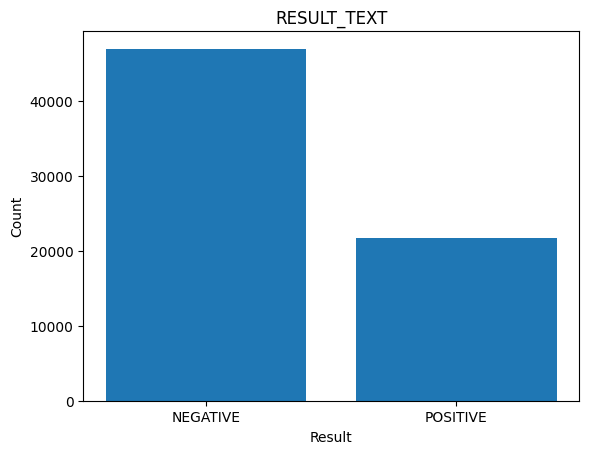

In [6]:
#Class Distribution
class_counts_typ = typhoid['RESULT_TEXT'].value_counts()

class_distribution_typ =class_counts_typ / len(typhoid) *100

print(class_distribution_typ)

#plot a bar graph
value = typhoid['RESULT_TEXT'].value_counts()

plt.bar(value.index, value.values)

plt.title('RESULT_TEXT')
plt.xlabel('Result')
plt.ylabel('Count')

plt.show()

NEGATIVE    50.0
POSITIVE    50.0
Name: RESULT_TEXT, dtype: float64


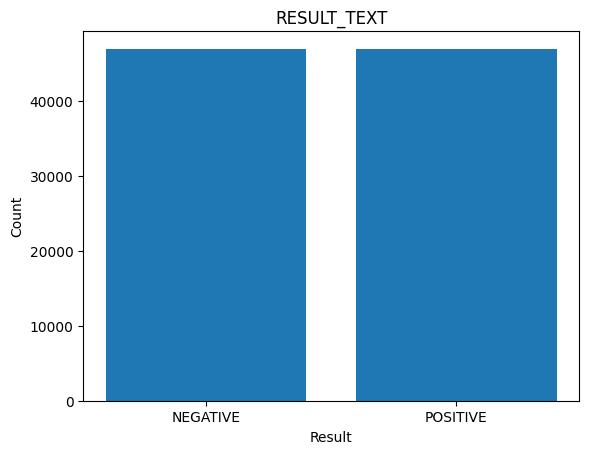

In [7]:
# Resample data to handle imbalance
x = typhoid.drop('RESULT_TEXT', axis = 1)
y = typhoid['RESULT_TEXT']

ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x, y)

#Concatenate the features and target into balanced datset
balanced_data = pd.concat([x_resampled, y_resampled], axis=1)

balanced_data.to_csv('new_copy2/Balanced_Typhoid.csv', index = False)

Balanced_typhoid = pd.read_csv('new_copy2/Balanced_Typhoid.csv')

#Class Distribution
class_counts_typ = Balanced_typhoid['RESULT_TEXT'].value_counts()

class_distribution_typ =class_counts_typ / len(Balanced_typhoid) *100

print(class_distribution_typ)

#plot a bar graph
value = Balanced_typhoid['RESULT_TEXT'].value_counts()

plt.bar(value.index, value.values)

plt.title('RESULT_TEXT')
plt.xlabel('Result')
plt.ylabel('Count')

plt.show()

## DATA TRANSFORMATION

In [8]:
typhoid.shape

(68624, 19)

In [9]:
le = LabelEncoder()
Balanced_typhoid["MRNO_encoded"] = le.fit_transform(Balanced_typhoid["MRNO"])
Balanced_typhoid["RESULT_VALUE_encoded"] = le.fit_transform(Balanced_typhoid["RESULT_VALUE"])
Balanced_typhoid["GENDER_encoded"] = le.fit_transform(Balanced_typhoid["GENDER"])
Balanced_typhoid["REPORT_VERIFIED_encoded"] = le.fit_transform(Balanced_typhoid["REPORT_VERIFIED"])
Balanced_typhoid["RESULT_TEXT_encoded"] = le.fit_transform(Balanced_typhoid["RESULT_TEXT"])
# One-hot encode District and Tehsil
ohe = OneHotEncoder(sparse=False)
district_tehsil_encoded = ohe.fit_transform(Balanced_typhoid[["DISTRICT", "TEHSIL"]])
district_tehsil_encoded_df = pd.DataFrame(district_tehsil_encoded, columns=ohe.get_feature_names_out(["DISTRICT", "TEHSIL"]))

# Combine the encoded columns with the original dataset
new_df = pd.concat([Balanced_typhoid["MRNO_encoded"], district_tehsil_encoded_df], axis=1)
new_df["AGE"] = Balanced_typhoid["AGE"]
new_df["RESULT_TEXT"] = Balanced_typhoid["RESULT_TEXT_encoded"]
new_df["GENDER"] = Balanced_typhoid["GENDER_encoded"]
new_df["RESULT_VALUE"] = Balanced_typhoid["RESULT_VALUE_encoded"]
new_df["REPORT_VERIFIED"] = Balanced_typhoid["REPORT_VERIFIED_encoded"]
new_df["CPT_ID"] = Balanced_typhoid["CPT_ID"]
new_df["CPT_ID.1"] = Balanced_typhoid["CPT_ID.1"]
# Save the new dataframe to a new CSV file
new_df.to_csv('new_copy2/New_Typhoid.csv', index = False)

C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
print(Balanced_typhoid['MRNO_encoded'])

0        27772
1        27772
2        27773
3        27775
4        27777
         ...  
93841    32347
93842    26561
93843    15158
93844    31028
93845    10957
Name: MRNO_encoded, Length: 93846, dtype: int32


## NORMALISATION

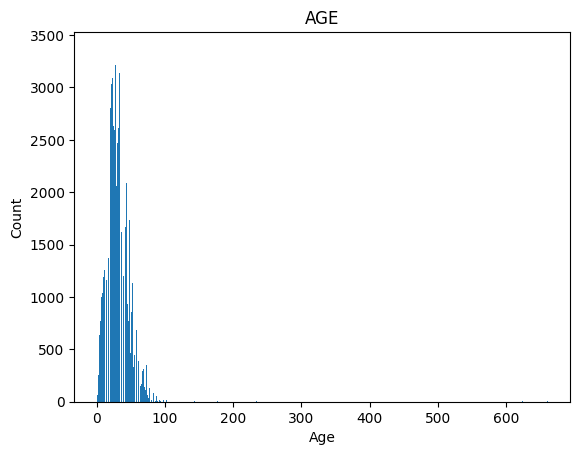

In [11]:
value = Balanced_typhoid['AGE'].value_counts()

plt.bar(value.index, value.values)

plt.title('AGE')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

In [12]:
Transformed_typhoid = pd.read_csv('new_copy2/New_Typhoid.csv', low_memory = False)
# Column to be normalized
column = ['AGE']

Transformed_typhoid[column] = (Transformed_typhoid[column] - Transformed_typhoid[column].mean()) / Transformed_typhoid[column].std()

# New .csv file with normalized data
Transformed_typhoid.to_csv('new_copy2/Normalized_Typhoid.csv', index = False)# Column to be normalized
column = ['AGE']

Transformed_typhoid[column] = (Transformed_typhoid[column] - Transformed_typhoid[column].mean()) / Transformed_typhoid[column].std()

# New .csv file with normalized data
Transformed_typhoid.to_csv('new_copy2/Normalized_Typhoid.csv', index = False)

0    0.098808
1    0.098808
2    1.205045
3   -0.017638
4    0.273477
Name: AGE, dtype: float64


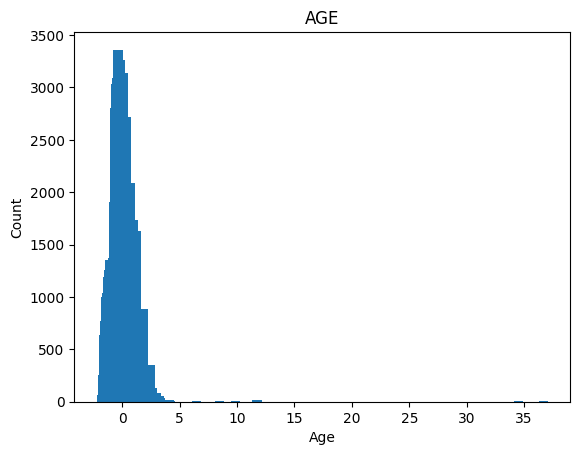

In [13]:
Normal_typhoid = pd.read_csv('new_copy2/Normalized_Typhoid.csv', low_memory = False)
print(Normal_typhoid['AGE'].head())

value = Normal_typhoid['AGE'].value_counts()

plt.bar(value.index, value.values)

plt.title('AGE')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

In [14]:
Normal_typhoid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93846 entries, 0 to 93845
Columns: 171 entries, MRNO_encoded to CPT_ID.1
dtypes: float64(166), int64(5)
memory usage: 122.4 MB


In [15]:
Normal_typhoid.head()

,MRNO_encoded,DISTRICT_Abbottabad,DISTRICT_Afghanistan,DISTRICT_Attock,DISTRICT_Awaran,DISTRICT_BAGH,DISTRICT_BAJAUR,DISTRICT_Bahawalnagar,DISTRICT_Bannu,DISTRICT_Batgram,...,TEHSIL_UNKNOWN F.A.T.A,TEHSIL_Wah Cantt,TEHSIL_havelia,AGE,RESULT_TEXT,GENDER,RESULT_VALUE,REPORT_VERIFIED,CPT_ID,CPT_ID.1
0,27772,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.098808,0,0,1,7260,1.000000e+15,1.000000e+15
1,27772,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.098808,0,0,1,7259,1.000000e+15,1.000000e+15
2,27773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.205045,0,1,1,1269,1.000000e+15,1.000000e+15
3,27775,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.017638,1,1,1,27844,1.000000e+15,1.000000e+15
4,27777,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.273477,0,1,1,40977,1.000000e+15,1.000000e+15


In [16]:
Normal_typhoid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93846 entries, 0 to 93845
Columns: 171 entries, MRNO_encoded to CPT_ID.1
dtypes: float64(166), int64(5)
memory usage: 122.4 MB


## Random forest feature selection

In [17]:
# Drop rows with missing data
Normal_typhoid.dropna(inplace=True)

# Split the data into feature matrix X and target vector y
X = Normal_typhoid.drop('RESULT_TEXT', axis=1)
y = Normal_typhoid['RESULT_TEXT']

In [18]:
# Use random forest to select the most important features
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X, y)
importance = rfc.feature_importances_

In [19]:
# feat_imp=pd.Series(importance, index=X.columns)
# feat_imp.nlargest(7).plot(kind="barh")
# print(feat_imp.nlargest(7))
# plt.show()

In [20]:
# Create a list of (feature name, importance) tuples and sort by importance
features = list(zip(X.columns, importance))
features.sort(key=lambda x: x[1], reverse=True)

# Print the sorted list of feature importances
for f in features:
    print(f)


# Select the top k features
k = 7
top_features = [f[0] for f in features[:k]]
for f in top_features:
    print(f)
X = X[top_features]

('MRNO_encoded', 0.40704176161630495)
('REPORT_VERIFIED', 0.39047947041446707)
('AGE', 0.17613753096472326)
('GENDER', 0.005761131747862305)
('RESULT_VALUE', 0.0011238179392888156)
('TEHSIL_Abbottabad', 0.0009823398291300407)
('DISTRICT_Abbottabad', 0.0009011368057743428)
('DISTRICT_Mansehra', 0.000876645182142346)
('TEHSIL_Mansehra', 0.0008520856934260704)
('DISTRICT_Batgram', 0.0006385901777720695)
('TEHSIL_havelia', 0.0006299979525061575)
('TEHSIL_Batagram', 0.00062299356944932)
('DISTRICT_Kohistan', 0.0006183241711852847)
('TEHSIL_Oghi', 0.0006113146246479933)
('TEHSIL_Balakot', 0.0005871756387179462)
('DISTRICT_Haripur', 0.0005639091603677817)
('TEHSIL_Haripur', 0.0005606335995905304)
('TEHSIL_Dassu', 0.0005508159261463352)
('TEHSIL_Alai', 0.0004961521086400273)
('TEHSIL_Palas', 0.0004243868519627409)
('TEHSIL_Pattan', 0.00038208077471899905)
('DISTRICT_DIAMIR', 0.00034008256168291715)
('DISTRICT_Shangla', 0.0003400143873335003)
('TEHSIL_CHILAS', 0.0003303626096785635)
('DISTRICT_

## HISTOGRAM FOR FEATURE SELECTION

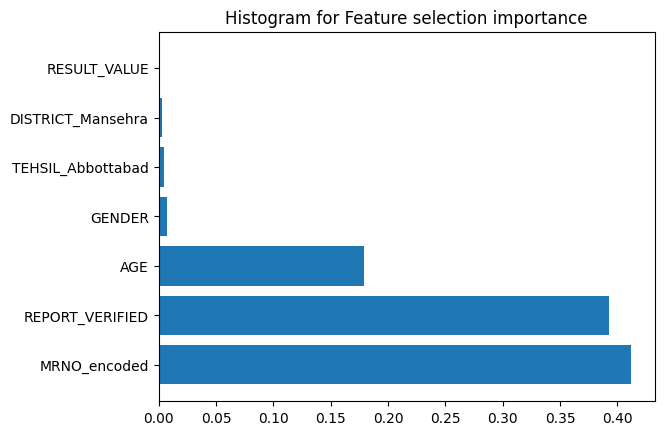

In [29]:

plt.title("Histogram for Feature selection importance");
plt.barh([x[0] for x in features],[x[1] for x in features])
plt.show()


## RANDOM FOREST CLASSIFIER

In [21]:
# Train and evaluate the model using KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [22]:
accuracy_scores = []
y_preds=[]
y_tests=[]
for train_index, test_index in kf.split(X):
    # Split data into train and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and train the random forest classifier
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(X_train, y_train)

    # Make predictions on the test set and calculate accuracy
    y_pred = rfc.predict(X_test)
    y_preds.extend(y_pred)
    y_tests.extend(y_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Add accuracy score to list
    accuracy_scores.append(accuracy)
pk.dump(rfc,open("model.pkl","wb"))

In [32]:
# Compute and print the mean accuracy score and standard deviation
print("Accuracy- Random forest classifier: %0.2f (+/- %0.2f)" % (np.mean(accuracy_scores), np.std(accuracy_scores) * 2))

Accuracy- Random forest classifier: 0.69 (+/- 0.01)


### CONFUSION MATRIX FOR RF

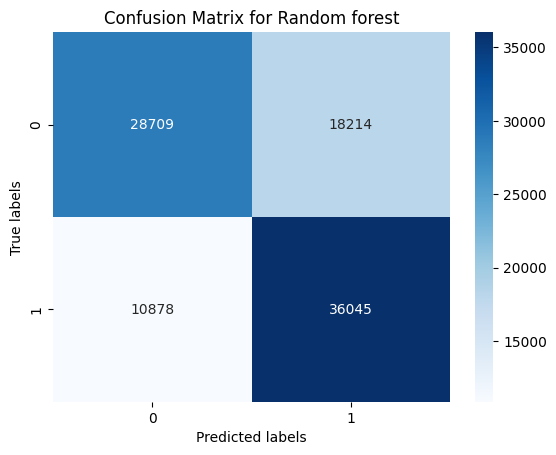

In [33]:
# Assuming the true and predicted labels are stored in y_true and y_pred respectively
cm = confusion_matrix(y_tests, y_preds)

# Create a heatmap of the confusion matrix using Seaborn
sp.heatmap(cm, annot=True, cmap="Blues", fmt = 'd')

# Add axis labels and a title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Random forest")
plt.show()

### ROC CURVE

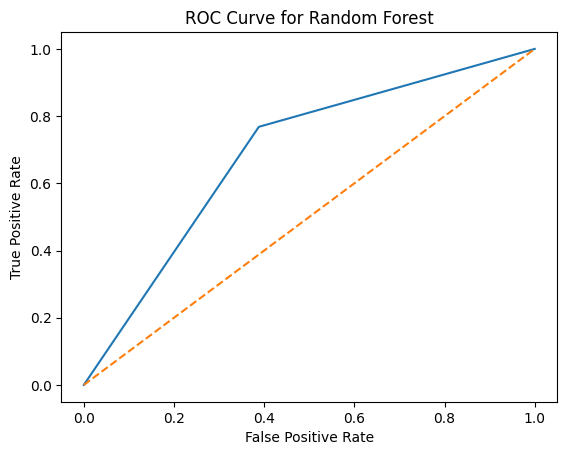

In [34]:
# y_true: true labels, y_pred_prob: predicted probabilities
fpr, tpr, thresholds = roc_curve(y_tests, y_preds)

# plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # plot random curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()

## KNN 

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []
# Perform K-fold cross-validation and evaluate the model's performance
y_true = []
y_pred = []
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    knn.fit(X_train, y_train)
    y_true.extend(y_test)
    y_pred.extend(knn.predict(X_test))
    

In [36]:
accuracy = accuracy_score(y_true, y_pred)
# Add accuracy score to list
accuracy_scores.append(accuracy)
# Compute and print the mean accuracy score and standard deviation
print("Accuracy- KNN: %0.2f (+/- %0.2f)" % (np.mean(accuracy_scores), np.std(accuracy_scores) * 2))

Accuracy- KNN: 0.65 (+/- 0.00)


### CONFUSION MATRIX for KNN

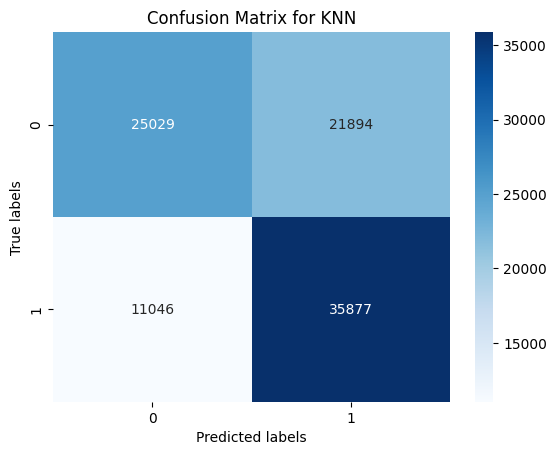

In [37]:
# Assuming the true and predicted labels are stored in y_true and y_pred respectively
cm = confusion_matrix(y_true, y_pred)
# Create a heatmap of the confusion matrix using Seaborn
sp.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Add axis labels and a title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for KNN")

# Show the plot
plt.show()

### ROC curve

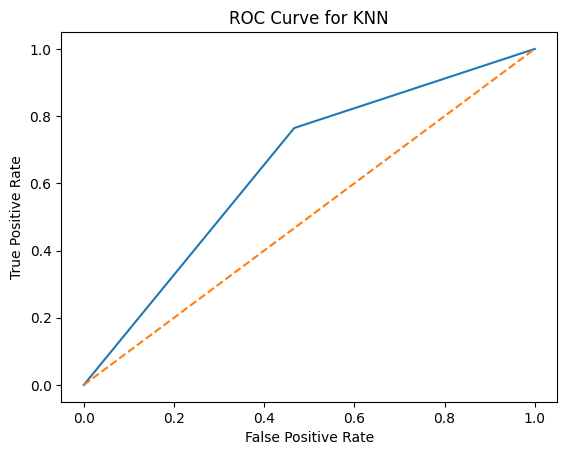

In [39]:
# y_true: true labels, y_pred_prob: predicted probabilities
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # plot random curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.show()

## DECISION TREE

In [40]:
# Initialize an empty list to store cross-validation scores
scores = []
y_pred=[]
y_preds=[]
y_tests=[]
# Iterate over the splits of the data and train/test the model
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the decision tree classifier
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    
    # Evaluate the model's performance on the test set for this fold and store the score
    y_pred = dt.predict(X_test)
    y_preds.extend(y_pred)
    y_tests.extend(y_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = sum(scores) / len(scores)
std_dev = np.std(scores)

# Print the results
print("Accuracy-Decision tree: %0.2f (+/- %0.2f)" % (mean_score, std_dev * 2))

Accuracy-Decision tree: 0.62 (+/- 0.01)


### CONFUSION MATRIX

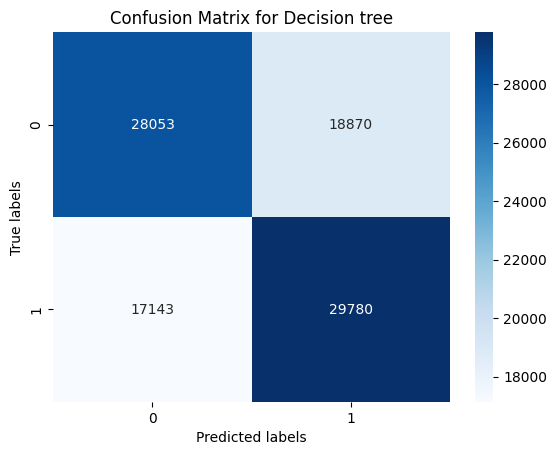

In [41]:
# Assuming the true and predicted labels are stored in y_true and y_pred respectively
cm = confusion_matrix(y_tests, y_preds)
np.set_printoptions(precision=3, suppress=True)
# Create a heatmap of the confusion matrix using Seaborn
sp.heatmap(cm, annot=True, cmap="Blues",fmt="d")

# Add axis labels and a title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Decision tree")

# Show the plot
plt.show()

### ROC CURVE

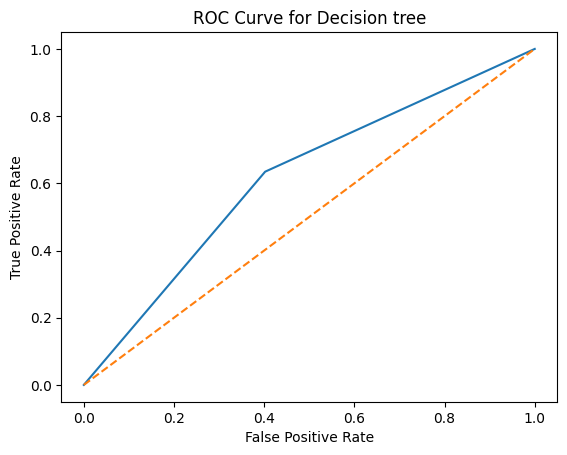

In [42]:
# y_true: true labels, y_pred_prob: predicted probabilities
fpr, tpr, thresholds = roc_curve(y_tests, y_preds)

# plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # plot random curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision tree')
plt.show()

## LOGISITIC REGRESSION

In [43]:
# Perform 10-fold cross validation using KFold method
kf = KFold(n_splits=10, shuffle=True, random_state=42)
lr = LogisticRegression(C=1)
scores = []
y_preds = []
y_true = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    y_preds.extend(y_pred)
    y_true.extend(y_test)
    scores.append(lr.score(X_test, y_test))

# Calculate and print the cross-validation accuracy
print("Accuracy- Logistic Regression: %0.2f (+/- %0.2f)" % (np.mean(scores), np.std(scores) * 2))

Accuracy- Logistic Regression: 0.55 (+/- 0.01)


### CONFUSION MATRIX FOR LOGISTIC REGRESSION

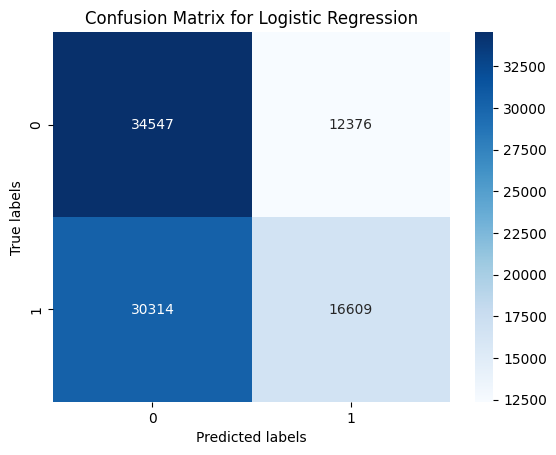

In [44]:
# Assuming the true and predicted labels are stored in y_true and y_pred respectively
cm = confusion_matrix(y_true, y_preds)
np.set_printoptions(precision=3, suppress=True)
# Create a heatmap of the confusion matrix using Seaborn
sp.heatmap(cm, annot=True, cmap="Blues",fmt="d")

# Add axis labels and a title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Logistic Regression")

# Show the plot
plt.show()

### ROC curve for Logistic Regression

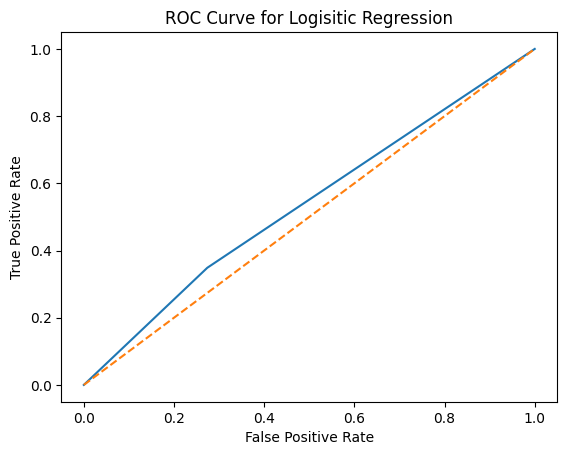

In [45]:
# y_true: true labels, y_pred_prob: predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # plot random curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logisitic Regression')
plt.show()

## SUPPORT VECTOR MACHINE

FIRST

In [46]:
y_pred=[]
y_preds=[]
y_true=[]
# Define the desired sample size for the reduced dataset
sample_size = 5000

# Initialize SVM classifier with default hyperparameters
svm = SVC()

# Use stratified k-fold cross-validation to evaluate classifier performance
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
scores = []

# Loop over each fold and perform stratified sampling on the training set
for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Use stratified sampling to select the desired number of samples from each class
    X_sampled, y_sampled = resample(X_train, y_train, n_samples=sample_size, stratify=y_train, random_state=42)

    # Fit SVM classifier on the reduced dataset and evaluate performance on the test set
    svm.fit(X_sampled, y_sampled)
    y_pred = svm.predict(X_test)
    y_preds.extend(y_pred)
    y_true.extend(y_test)
    scores.append(svm.score(X_test,y_test))

# Print the average classification accuracy over all folds
print("Accuracy- SVM: {:.2f}".format(sum(scores)/len(scores)))



Accuracy- SVM: 0.60


## CONFUSION MATRIX for SVM

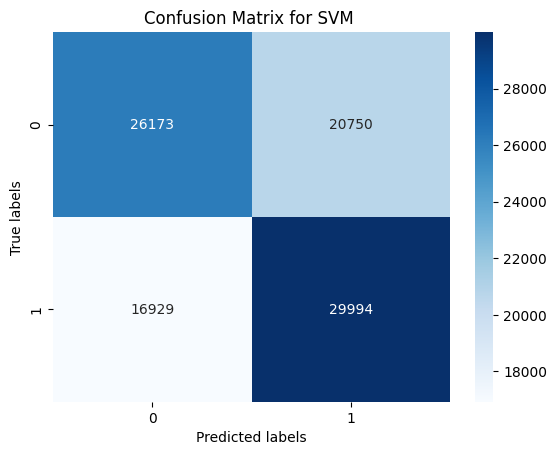

In [48]:
# Assuming the true and predicted labels are stored in y_true and y_pred respectively
cm = confusion_matrix(y_true, y_preds)
np.set_printoptions(precision=3, suppress=True)
# Create a heatmap of the confusion matrix using Seaborn
sp.heatmap(cm, annot=True, cmap="Blues",fmt="d")

# Add axis labels and a title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for SVM ")

# Show the plot
plt.show()

### ROC curve for SVM

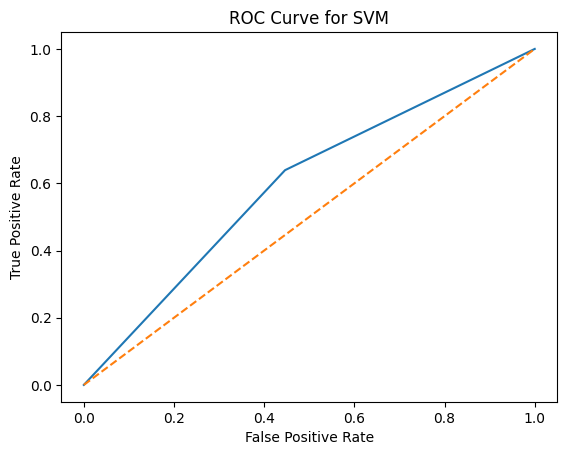

In [49]:
# y_true: true labels, y_pred_prob: predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # plot random curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.show()

## ENSEMBLE

In [24]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Set up KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize empty lists to store scores and predictions
scores = []
y_preds = []
y_tests = []

# Train the models and ensemble them
rf = RandomForestClassifier(n_estimators=100)
dt = DecisionTreeClassifier(random_state=42)
lr=LogisticRegression(C=1)
ensemble = VotingClassifier(estimators=[('rf', rf), ('dt', dt), ('lr', lr)], voting='hard')

# Loop over the splits of the data and train/test the models
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the models to the training data for this fold
    rf.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    lr.fit(X_train, y_train)

    # Fit the ensemble model to the training data for this fold
    ensemble.fit(X_train, y_train)

    # Evaluate the performance of the ensemble model on the test set for this fold
    y_pred = ensemble.predict(X_test)
    y_preds.extend(y_pred)
    y_tests.extend(y_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = sum(scores) / len(scores)
std_dev = np.std(scores)

# Print the results
print("Ensemble accuracy: %0.4f (+/- %0.2f)" % (mean_score, std_dev * 2))


Ensemble accuracy: 0.6495 (+/- 0.01)


### ADABOOSTING

In [21]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier

# Set up KFold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Initialize empty lists to store scores and predictions
scores = []
y_preds = []
y_tests = []

# Train the models and ensemble them
rf = RandomForestClassifier(n_estimators=100)
dt = DecisionTreeClassifier(random_state=42)
ada = AdaBoostClassifier(estimator=dt, n_estimators=100)

# Loop over the splits of the data and train/test the models
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the models to the training data for this fold
    rf.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    ada.fit(X_train, y_train)

    # Combine the models into a voting classifier
    ensemble = VotingClassifier(estimators=[('rf', rf), ('ada', ada)], voting='hard')
    
    # Fit the ensemble model to the training data for this fold
    ensemble.fit(X_train, y_train)

    # Evaluate the performance of the ensemble model on the test set for this fold
    y_pred = ensemble.predict(X_test)
    y_preds.extend(y_pred)
    y_tests.extend(y_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = sum(scores) / len(scores)
std_dev = np.std(scores)

# Print the results
print("AdaBoost Ensemble accuracy: %0.4f (+/- %0.2f)" % (mean_score, std_dev * 2))

AdaBoost Ensemble accuracy: 0.6317 (+/- 0.02)
